In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

image_path = r"C:\E0323036-SEM6\dl_med\POSITIVE.jpeg"
xray = cv2.imread(image_path, 0)
if xray is None:
    print("Image not found")
else:
    print("Image found")

Image found


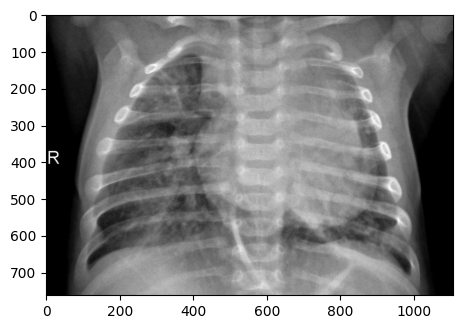

In [11]:
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
plt.imshow(xray,cmap='grey')